In [532]:
import pandas as pd

train=pd.read_csv("./Train/Train.csv")
test=pd.read_csv("./Test.csv")
health_camp=pd.read_csv("./Train/Health_Camp_Detail.csv")

health_1 =pd.read_csv("./Train/First_Health_Camp_Attended.csv")
health_2 =pd.read_csv("./Train/Second_Health_Camp_Attended.csv")
health_3 =pd.read_csv("./Train/Third_Health_Camp_Attended.csv")
print("Train")
print(train.head())
print("Test")
print(test.head())
print("Health camp")
print(health_camp.head())
print("Health 1")
print(health_1.head())
print("Health 2")
print(health_2.head())
print("Health 3")
print(health_3.head())

Train
   Patient_ID  Health_Camp_ID Registration_Date  Var1  Var2  Var3  Var4  Var5
0      489652            6578         10-Sep-05     4     0     0     0     2
1      507246            6578         18-Aug-05    45     5     0     0     7
2      523729            6534         29-Apr-06     0     0     0     0     0
3      524931            6535         07-Feb-04     0     0     0     0     0
4      521364            6529         28-Feb-06    15     1     0     0     7
Test
   Patient_ID  Health_Camp_ID Registration_Date  Var1  Var2  Var3  Var4  Var5
0      505701            6548         21-May-06     1     0     0     0     2
1      500633            6584         02-Jun-06     0     0     0     0     0
2      506945            6582         10-Aug-06     0     0     0     0     0
3      497447            6551         27-Aug-06     0     0     0     0     0
4      496446            6533         19-Sep-06     0     0     0     0     0
Health camp
   Health_Camp_ID Camp_Start_Date Camp_En

In [533]:
health_1=health_1.iloc[:,[0,1,2,3]]
health_1.columns=['Patient_ID', 'Health_Camp_ID', 'Donation', 'Health_Score_1']
health_2.columns=['Patient_ID', 'Health_Camp_ID', 'Health_Score_2']
train['train_flag']=1
test['train_flag']=0
train['sod']='train'
test['sod']='test'
X_panel =train.append(test)
X_panel.head()


Patient_ID  Health_Camp_ID Registration_Date  Var1  Var2  Var3  Var4  Var5  \
0      489652            6578         10-Sep-05     4     0     0     0     2   
1      507246            6578         18-Aug-05    45     5     0     0     7   
2      523729            6534         29-Apr-06     0     0     0     0     0   
3      524931            6535         07-Feb-04     0     0     0     0     0   
4      521364            6529         28-Feb-06    15     1     0     0     7   

   train_flag    sod  
0           1  train  
1           1  train  
2           1  train  
3           1  train  
4           1  train

In [534]:

X_panel=X_panel.merge(health_1,on=['Patient_ID','Health_Camp_ID'],how='left')

In [535]:
X_panel=X_panel.merge(health_2,on=['Patient_ID','Health_Camp_ID'],how='left')

In [536]:
X_panel=X_panel.merge(health_3,on=['Patient_ID','Health_Camp_ID'],how='left')

In [537]:
X_panel.head()

Patient_ID  Health_Camp_ID Registration_Date  Var1  Var2  Var3  Var4  Var5  \
0      489652            6578         10-Sep-05     4     0     0     0     2   
1      507246            6578         18-Aug-05    45     5     0     0     7   
2      523729            6534         29-Apr-06     0     0     0     0     0   
3      524931            6535         07-Feb-04     0     0     0     0     0   
4      521364            6529         28-Feb-06    15     1     0     0     7   

   train_flag    sod  Donation  Health_Score_1  Health_Score_2  \
0           1  train       NaN             NaN             NaN   
1           1  train       NaN             NaN             NaN   
2           1  train       NaN             NaN        0.402054   
3           1  train       NaN             NaN             NaN   
4           1  train       NaN             NaN        0.845597   

   Number_of_stall_visited  Last_Stall_Visited_Number  
0                      2.0                        1.0  
1                      NaN                        NaN  
2                      NaN                        NaN  
3                      NaN                        NaN  
4                      NaN                        NaN

In [538]:
X_panel=X_panel.merge(health_camp, how='left', on = "Health_Camp_ID")
X_panel.shape

(110527, 20)

In [539]:
patient =pd.read_csv("./Train/Patient_Profile.csv")

X_panel=X_panel.merge(patient, how='left', on = "Patient_ID")
X_panel.shape

(110527, 30)

In [540]:
# creating target variable
X_panel['target']=0
X_panel.head()

Patient_ID  Health_Camp_ID Registration_Date  Var1  Var2  Var3  Var4  Var5  \
0      489652            6578         10-Sep-05     4     0     0     0     2   
1      507246            6578         18-Aug-05    45     5     0     0     7   
2      523729            6534         29-Apr-06     0     0     0     0     0   
3      524931            6535         07-Feb-04     0     0     0     0     0   
4      521364            6529         28-Feb-06    15     1     0     0     7   

   train_flag    sod   ...    LinkedIn_Shared  Twitter_Shared  \
0           1  train   ...                  0               0   
1           1  train   ...                  0               0   
2           1  train   ...                  0               0   
3           1  train   ...                  0               0   
4           1  train   ...                  0               0   

   Facebook_Shared  Income  Education_Score   Age First_Interaction City_Type  \
0                0    None             None  None         06-Dec-04       NaN   
1                0       1               75    40         08-Sep-04         C   
2                0    None             None  None         22-Jun-04       NaN   
3                0    None             None  None         07-Feb-04         I   
4                1       1               70    40         04-Jul-03         I   

  Employer_Category  target  
0               NaN       0  
1            Others       0  
2               NaN       0  
3               NaN       0  
4        Technology       0  

[5 rows x 31 columns]

In [541]:
X_panel.loc[(X_panel.Category1!='Third')&((X_panel.Health_Score_1>0) |(X_panel.Health_Score_2>0)),'target']=1
X_panel.loc[(X_panel.Category1=='Third')&(X_panel.Number_of_stall_visited>0),'target']=1





In [542]:
X_panel.City_Type.unique()

array([nan, 'C', 'I', 'D', 'B', 'A', 'E', 'G', 'H', 'F'], dtype=object)

In [543]:
X_panel.Registration_Date=pd.DatetimeIndex(X_panel.Registration_Date)
X_panel.Camp_Start_Date=pd.DatetimeIndex(X_panel.Camp_Start_Date)
X_panel.Camp_End_Date=pd.DatetimeIndex(X_panel.Camp_End_Date)
X_panel.Category1=X_panel['Category1'].astype('category').cat.codes
X_panel.Category2=X_panel.Category2.astype('category').cat.codes
X_panel.City_Type=X_panel.City_Type.astype('category').cat.codes
X_panel.Income=X_panel.Income.astype('category').cat.codes
X_panel.Education_Score=X_panel.Education_Score.astype('category').cat.codes
X_panel.Age=X_panel.Age.astype('category').cat.codes



In [544]:
X_panel=X_panel.sort_values(['Patient_ID','Registration_Date'])
X_panel['order'] =range(1, (X_panel.shape[0])+1)
X_panel.head()

Patient_ID  Health_Camp_ID Registration_Date  Var1  Var2  Var3  Var4  \
81900      485678            6551        2006-11-13     0     0     0     0   
69348      485679            6578        2005-08-22     0     0     0     0   
64479      485679            6555        2005-08-31     0     0     0     0   
6484       485680            6543        2006-07-10     0     0     0     0   
18999      485681            6580        2004-12-20     0     0     0     0   

       Var5  train_flag    sod  ...    Twitter_Shared  Facebook_Shared  \
81900     0           0   test  ...                 0                0   
69348     0           1  train  ...                 0                0   
64479     0           1  train  ...                 0                0   
6484      0           1  train  ...                 0                0   
18999     0           1  train  ...                 0                1   

       Income  Education_Score  Age First_Interaction City_Type  \
81900       7              227   50         13-Nov-06         0   
69348       7              227   50         12-Aug-05         8   
64479       7              227   50         12-Aug-05         8   
6484        7              227   50         10-Jul-06         0   
18999       0              227   16         19-Dec-04         6   

       Employer_Category  target  order  
81900                NaN       0      1  
69348                NaN       1      2  
64479                NaN       0      3  
6484                 NaN       0      4  
18999                NaN       0      5  

[5 rows x 32 columns]

In [545]:
X_date=X_panel.loc[:,['Patient_ID','Registration_Date','order']]
print(X_date.shape)
X_date.head()

(110527, 3)


Patient_ID Registration_Date  order
81900      485678        2006-11-13      1
69348      485679        2005-08-22      2
64479      485679        2005-08-31      3
6484       485680        2006-07-10      4
18999      485681        2004-12-20      5

In [546]:
# previous and next date for each patient
X_date['Prev_Date']=X_date.groupby('Patient_ID').Registration_Date.shift(1)
print(X_date.shape)
X_date.head()

(110527, 4)


Patient_ID Registration_Date  order  Prev_Date
81900      485678        2006-11-13      1        NaT
69348      485679        2005-08-22      2        NaT
64479      485679        2005-08-31      3 2005-08-22
6484       485680        2006-07-10      4        NaT
18999      485681        2004-12-20      5        NaT

In [547]:
X_date['Next_Date']=X_date.groupby('Patient_ID').Registration_Date.shift(-1)
print(X_date.shape)

X_date.head()

(110527, 5)


Patient_ID Registration_Date  order  Prev_Date  Next_Date
81900      485678        2006-11-13      1        NaT        NaT
69348      485679        2005-08-22      2        NaT 2005-08-31
64479      485679        2005-08-31      3 2005-08-22        NaT
6484       485680        2006-07-10      4        NaT        NaT
18999      485681        2004-12-20      5        NaT 2005-01-01

In [548]:
#X_date.loc[X_date.Prev_Date.isnull(),'Prev_Date']=0
#X_date.loc[X_date.Next_Date.isnull(),'Next_Date']=0
X_date=X_date.drop(['Patient_ID','order','Registration_Date'],axis=1)
print(X_date.shape)
X_date.head()

(110527, 2)


Prev_Date  Next_Date
81900        NaT        NaT
69348        NaT 2005-08-31
64479 2005-08-22        NaT
6484         NaT        NaT
18999        NaT 2005-01-01

In [549]:
X_panel.head()

Patient_ID  Health_Camp_ID Registration_Date  Var1  Var2  Var3  Var4  \
81900      485678            6551        2006-11-13     0     0     0     0   
69348      485679            6578        2005-08-22     0     0     0     0   
64479      485679            6555        2005-08-31     0     0     0     0   
6484       485680            6543        2006-07-10     0     0     0     0   
18999      485681            6580        2004-12-20     0     0     0     0   

       Var5  train_flag    sod  ...    Twitter_Shared  Facebook_Shared  \
81900     0           0   test  ...                 0                0   
69348     0           1  train  ...                 0                0   
64479     0           1  train  ...                 0                0   
6484      0           1  train  ...                 0                0   
18999     0           1  train  ...                 0                1   

       Income  Education_Score  Age First_Interaction City_Type  \
81900       7              227   50         13-Nov-06         0   
69348       7              227   50         12-Aug-05         8   
64479       7              227   50         12-Aug-05         8   
6484        7              227   50         10-Jul-06         0   
18999       0              227   16         19-Dec-04         6   

       Employer_Category  target  order  
81900                NaN       0      1  
69348                NaN       1      2  
64479                NaN       0      3  
6484                 NaN       0      4  
18999                NaN       0      5  

[5 rows x 32 columns]

In [550]:

X_panel=X_panel.merge(X_date,how='left',left_index=True,right_index=True)


In [551]:
X_panel.head()

Patient_ID  Health_Camp_ID Registration_Date  Var1  Var2  Var3  Var4  \
81900      485678            6551        2006-11-13     0     0     0     0   
69348      485679            6578        2005-08-22     0     0     0     0   
64479      485679            6555        2005-08-31     0     0     0     0   
6484       485680            6543        2006-07-10     0     0     0     0   
18999      485681            6580        2004-12-20     0     0     0     0   

       Var5  train_flag    sod    ...      Income  Education_Score  Age  \
81900     0           0   test    ...           7              227   50   
69348     0           1  train    ...           7              227   50   
64479     0           1  train    ...           7              227   50   
6484      0           1  train    ...           7              227   50   
18999     0           1  train    ...           0              227   16   

       First_Interaction  City_Type Employer_Category target  order  \
81900          13-Nov-06          0               NaN      0      1   
69348          12-Aug-05          8               NaN      1      2   
64479          12-Aug-05          8               NaN      0      3   
6484           10-Jul-06          0               NaN      0      4   
18999          19-Dec-04          6               NaN      0      5   

       Prev_Date  Next_Date  
81900        NaT        NaT  
69348        NaT 2005-08-31  
64479 2005-08-22        NaT  
6484         NaT        NaT  
18999        NaT 2005-01-01  

[5 rows x 34 columns]

In [552]:
# various date differences

X_panel['Start_Date_Diff']=(X_panel.Registration_Date-X_panel.Camp_Start_Date).dt.days
X_panel['End_Date_Diff']=(X_panel.Camp_Start_Date-X_panel.Registration_Date).dt.days

X_panel['Prev_Date_Diff']=(X_panel.Registration_Date-X_panel.Prev_Date).dt.days
X_panel['Next_Date_Diff']=(X_panel.Registration_Date-X_panel.Next_Date).dt.days
X_panel['Camp_Start_Year']=pd.DatetimeIndex(X_panel.Camp_Start_Date).year



In [558]:
X_panel=X_panel.loc[~pd.isnull(X_panel.Registration_Date)|(X_panel.Category3==2)|(X_panel.Camp_Start_Year>=2005),:]

In [559]:
X_patient=pd.DataFrame(X_panel.groupby('Patient_ID',as_index=False).target.count())
X_patient.columns=['Patient_ID','Count_Patient']
X_patient.head()

Patient_ID  Count_Patient
0      485678              1
1      485679              2
2      485680              1
3      485681              2
4      485682              1

In [560]:
X_panel=X_panel.merge(X_patient,how='left',on='Patient_ID')

In [561]:
X_patient_date=pd.DataFrame(X_panel.groupby(['Patient_ID','Registration_Date'],as_index=False).target.count())
X_patient_date.columns=['Patient_ID','Registration_Date','Count_Patient_Date']
X_patient_date.head()

Patient_ID Registration_Date  Count_Patient_Date
0      485678        2006-11-13                   1
1      485679        2005-08-22                   1
2      485679        2005-08-31                   1
3      485680        2006-07-10                   1
4      485681        2004-12-20                   1

In [562]:
X_panel=X_panel.merge(X_patient_date,how='left',on=['Patient_ID','Registration_Date'])

In [563]:
#X_donation <- X_panel[Donation > 0, .(Min_Date_Donation = min(Registration_Date)), .(Patient_ID)]
#Binary tag who have donated in the past
x_donation_df=X_panel.loc[X_panel.Donation>0,:]
x_donation_1=pd.DataFrame(x_donation_df.groupby('Patient_ID').Registration_Date.min().astype('datetime64[ns]'))
x_donation_1.columns=['Min_Registration_Date']
x_donation_1.head()

Min_Registration_Date
Patient_ID                      
485702                2004-10-16
485720                2004-08-15
485727                2004-03-19
485728                2004-10-14
485742                2005-05-04

In [564]:
X_panel=X_panel.merge(x_donation_1,how='left',left_index=True,right_index=True)
X_panel.shape

(110527, 42)

In [566]:
#X_panel[, Donation_Flag := ifelse(is.na(Min_Date_Donation), 0, ifelse(Registration_Date > Min_Date_Donation, 1, 0))]
X_panel['Donation_Flag']=0
X_panel.loc[~pd.isnull(X_panel.Min_Registration_Date),'Donation_Flag']=1
X_panel.loc[X_panel.Registration_Date>X_panel.Min_Registration_Date,'Donation_Flag']=1


In [567]:
X_test=X_panel.loc[X_panel.sod=='test',:]
X_train=X_panel.loc[X_panel.sod=='train',:]
X_test.head()

Patient_ID  Health_Camp_ID Registration_Date  Var1  Var2  Var3  Var4  \
0       485678            6551        2006-11-13     0     0     0     0   
7       485683            6584        2006-05-29     0     0     0     0   
8       485683            6582        2006-05-29     0     0     0     0   
9       485683            6548        2006-05-29     0     0     0     0   
10      485683            6583        2006-05-31     0     0     0     0   

    Var5  train_flag   sod      ...        Next_Date  Start_Date_Diff  \
0      0           0  test      ...              NaT              0.0   
7      0           0  test      ...       2006-05-29            -67.0   
8      0           0  test      ...       2006-05-29             53.0   
9      0           0  test      ...       2006-05-31            -15.0   
10     0           0  test      ...       2007-01-31            -63.0   

    End_Date_Diff  Prev_Date_Diff  Next_Date_Diff Camp_Start_Year  \
0             0.0             NaN             NaN            2006   
7            67.0             NaN             0.0            2006   
8           -53.0             0.0             0.0            2006   
9            15.0             0.0            -2.0            2006   
10           63.0             2.0          -245.0            2006   

   Count_Patient  Count_Patient_Date  Min_Registration_Date  Donation_Flag  
0              1                 1.0                    NaT              1  
7              5                 3.0                    NaT              1  
8              5                 3.0                    NaT              1  
9              5                 3.0                    NaT              1  
10             5                 1.0                    NaT              1  

[5 rows x 43 columns]

In [569]:
X_train=X_train.drop('sod',axis=1)
X_test=X_test.drop('sod',axis=1)

In [574]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

import xgboost as xgb


X=X_train
y=X_train.target

from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head()
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=10, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['target'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=10)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['target'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % accuracy_score(dtrain['target'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % roc_auc_score(dtrain['target'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

[0]	train-auc:0.854289+0.000380931	test-auc:0.847086+0.00292763
[10]	train-auc:0.867694+0.000965008	test-auc:0.85964+0.00307789
[20]	train-auc:0.870985+0.00066178	test-auc:0.861227+0.00288353
[30]	train-auc:0.873882+0.000498561	test-auc:0.862811+0.00275761
[40]	train-auc:0.876651+0.000491074	test-auc:0.864354+0.002749
[50]	train-auc:0.879517+0.000440874	test-auc:0.865832+0.0029128
[60]	train-auc:0.882167+0.000355821	test-auc:0.867+0.00297353
[70]	train-auc:0.884687+0.00040373	test-auc:0.868184+0.00303317
[80]	train-auc:0.887101+0.000451741	test-auc:0.869104+0.00312544
[90]	train-auc:0.889354+0.000429066	test-auc:0.870033+0.00327074
[100]	train-auc:0.891432+0.000507363	test-auc:0.870829+0.0033104
[110]	train-auc:0.893208+0.000532372	test-auc:0.871494+0.00334219
[120]	train-auc:0.894927+0.000485246	test-auc:0.872085+0.003286
[130]	train-auc:0.896681+0.000534556	test-auc:0.872645+0.00338085
[140]	train-auc:0.898277+0.000591104	test-auc:0.873126+0.00333233
[150]	train-auc:0.899927+0.000517

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x12b056898>>
Traceback (most recent call last):
  File "/Users/subu/xgboost/python-package/xgboost/core.py", line 326, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


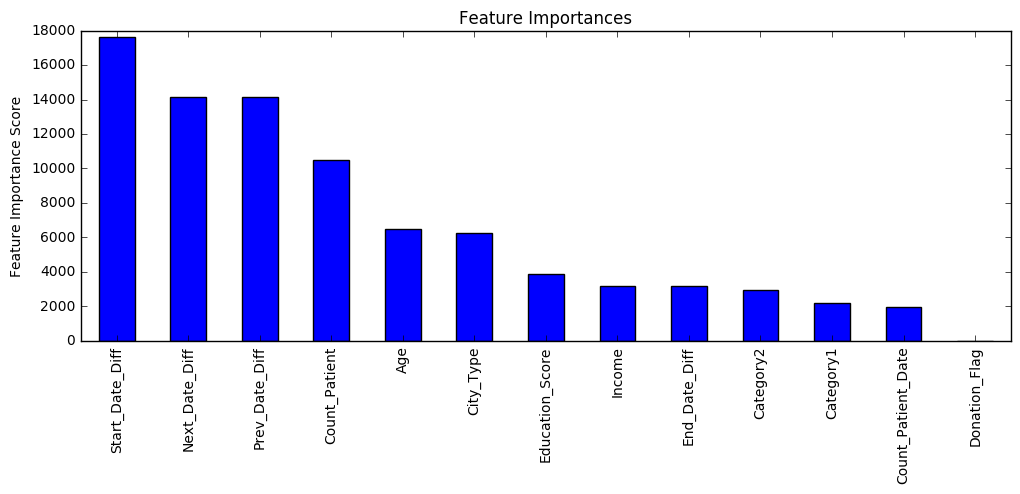

In [575]:
#Choose all predictors except target & IDcols
from xgboost.sklearn import XGBClassifier

predictors = ["Count_Patient", "Count_Patient_Date", "Donation_Flag",
                "City_Type", "Income", "Education_Score", "Age",
                "Category1", "Category2",
                "Start_Date_Diff", "End_Date_Diff", "Prev_Date_Diff", "Next_Date_Diff"]



#predictors=['Patient_Response','Camp_No','Age','duration','Education_Score','Var1','Var5','prev_outcome','Is_Shared']
xgb1 = XGBClassifier(
 learning_rate =0.05,
 n_estimators=1000,
 max_depth=7,
 min_child_weight=1,
 gamma=0,
 subsample=0.85,
 reg_alpha=1,
 colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)   
modelfit(xgb1, X, predictors)


In [578]:
pred=xgb1.predict(X_test.loc[:,predictors])
pred


array([0, 0, 0, ..., 0, 0, 0])

In [579]:
output=pd.DataFrame({'Patient_ID':X_test.Patient_ID,'Health_Camp_ID':X_test.Health_Camp_ID,'Outcome':pred})
output.to_csv("output_xgb.csv",columns=['Patient_ID','Health_Camp_ID','Outcome'],index=False)